In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [5]:
import sklearn
print(np.__version__)
print(pd.__version__)
print(sklearn.__version__)

1.24.3
1.5.3
1.3.0


In [3]:
crop_data = pd.read_csv("crop_recommendation_dataset.csv")
crop_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# Dataset Details


In [4]:
crop_data.size

17600

In [5]:
crop_data.shape   # total rows = 2200 , total features = 8

(2200, 8)

In [6]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
crop_data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
crop_data.duplicated().sum()

0

In [9]:
crop_data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [10]:
crop_data.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [11]:
crop_data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [12]:
crop_data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [13]:
crop_data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

# Exploring Data


In [14]:
corr = crop_data.corr(numeric_only=True)    # find the pairwise correlation of all columns
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

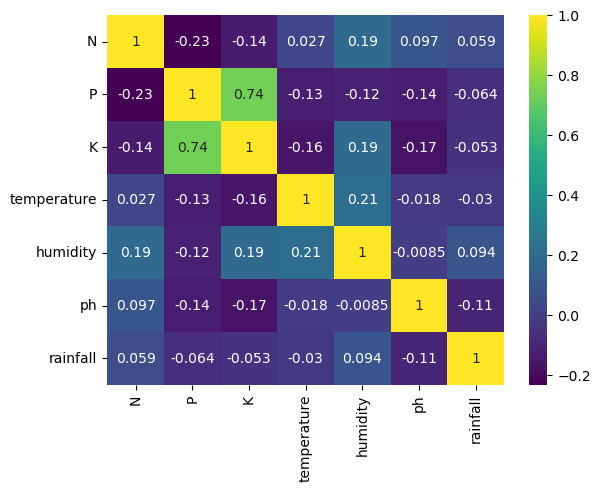

In [15]:
import seaborn as sns
sns.heatmap(corr,annot=True,cbar=True,cmap='viridis')

# Data Distribution


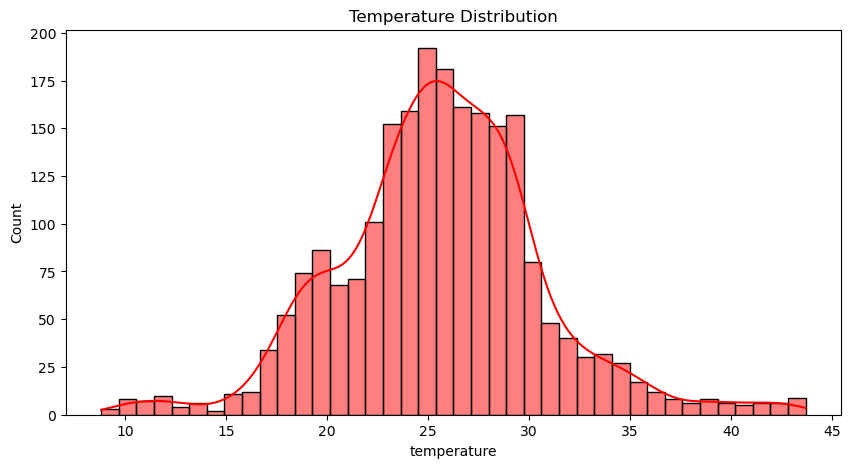

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

sns.histplot(crop_data['temperature'],kde=True,color='red')
plt.title("Temperature Distribution")
plt.show()

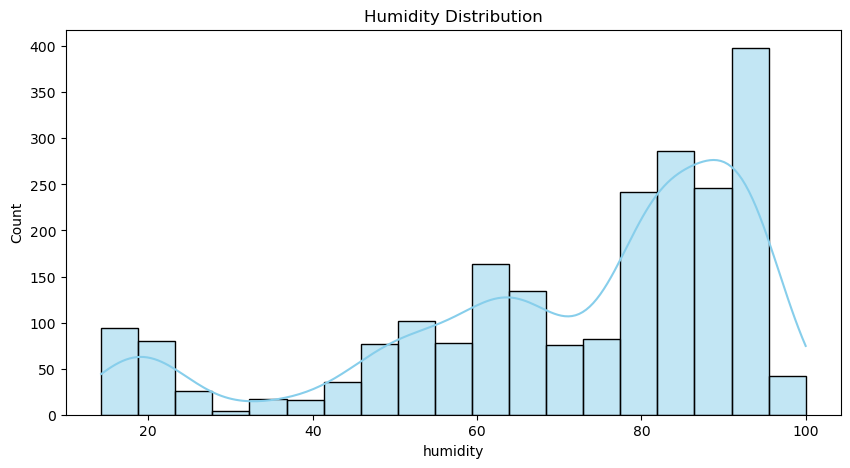

In [37]:
plt.figure(figsize=(10, 5))
sns.histplot(crop_data['humidity'],kde=True,color='skyblue')
plt.title("Humidity Distribution")
plt.show()

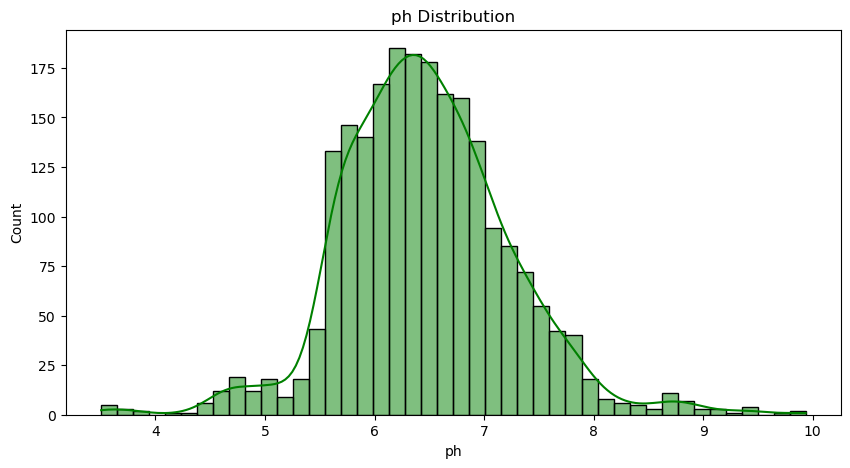

In [38]:
plt.figure(figsize=(10, 5))
sns.histplot(crop_data['ph'],kde=True,color='green')
plt.title("ph Distribution")
plt.show()

# Seperating features and target label

In [17]:
features = crop_data[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = crop_data['label']
labels = crop_data['label']

In [18]:
features.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [19]:
target.head()

0    rice
1    rice
2    rice
3    rice
4    rice
Name: label, dtype: object

In [20]:
# Initializing empty lists to append all model's name and corresponding name
accuracy = []
model = []

# Train, Test and Split

In [21]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [22]:
Xtrain

,N,P,K,temperature,humidity,ph,rainfall
1936,113,38,25,22.000851,79.472710,7.388266,90.422242
610,28,35,22,29.530376,86.733460,7.156563,59.872321
372,11,61,21,18.623288,23.024103,5.532101,135.337803
1559,29,139,205,23.641424,93.744615,6.155939,116.691218
1500,24,128,196,22.750888,90.694892,5.521467,110.431786
...,...,...,...,...,...,...,...
1071,105,88,54,25.787498,84.511942,6.020445,114.200546
433,27,71,23,23.453790,46.487148,7.109598,150.871220
674,23,39,22,29.256493,81.979522,6.864839,42.024833
1099,117,81,53,29.507046,78.205856,5.507642,98.125658


In [23]:
Ytrain

1936         cotton
610        mungbean
372     kidneybeans
1559          apple
1500          apple
           ...     
1071         banana
433      pigeonpeas
674        mungbean
1099         banana
1608         orange
Name: label, Length: 1760, dtype: object

# Models Selection

## Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

ypred = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, ypred)
accuracy.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

DecisionTrees's Accuracy is:  90.0


## Guassian Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x*100)

Naive Bayes's Accuracy is:  99.0909090909091


## Support Vector Machine (SVM)

In [26]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x*100)

SVM's Accuracy is:  10.681818181818182


## Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x*100)

Logistic Regression's Accuracy is:  95.22727272727273


## Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
model.append('RF')
print("RF's Accuracy is: ", x*100)

RF's Accuracy is:  99.0909090909091


# Accuracy Comparison

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

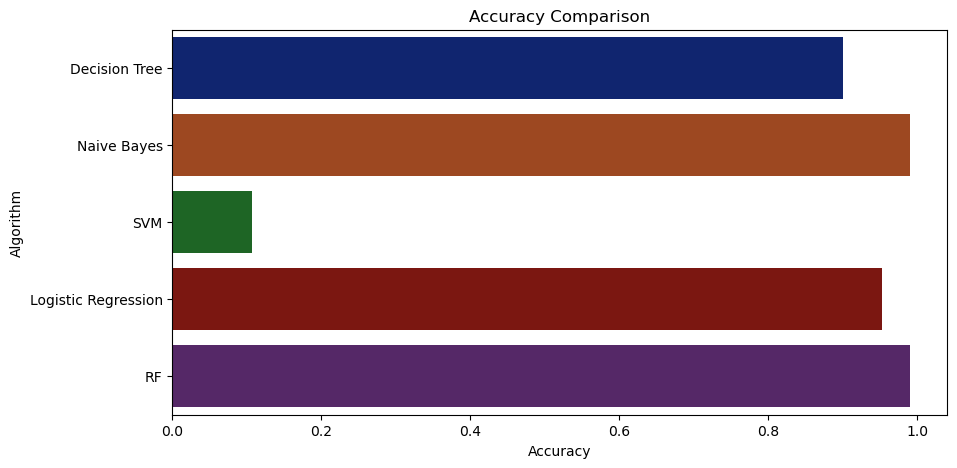

In [29]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = accuracy,y = model,palette='dark')

In [30]:
accuracy_models = dict(zip(model, accuracy))
for k, v in accuracy_models.items():
    print (k, '-->', v*100)

Decision Tree --> 90.0
Naive Bayes --> 99.0909090909091
SVM --> 10.681818181818182
Logistic Regression --> 95.22727272727273
RF --> 99.0909090909091


# Making a prediction

In [31]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [32]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['jute']


In [33]:
def recommendation(N,P,k,temperature,humidity,ph,rainfall):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfall]])

    
    prediction = RF.predict(features)
    
    return prediction[0]

In [34]:
recommendation(83, 45, 60, 28, 70.3, 7.0, 150.9)

'jute'

In [35]:
N = 90
P = 42
k = 43
temperature = 21
humidity = 82
ph = 6.5
rainfall = 202


# Make prediction
predict = recommendation(N, P, k, temperature, humidity, ph, rainfall)

# Crop dictionary
crop_dict = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']

if predict in crop_dict:
    print(f"{predict.capitalize()} is the best crop to be cultivated.")
else:
    print("Sorry, we are not able to recommend a proper crop for this environment.")

Rice is the best crop to be cultivated.


In [36]:
'''import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()
'''

"import pickle\n# Dump the trained Naive Bayes classifier with Pickle\nRF_pkl_filename = 'RandomForest.pkl'\n# Open the file to save as pkl file\nRF_Model_pkl = open(RF_pkl_filename, 'wb')\npickle.dump(RF, RF_Model_pkl)\n# Close the pickle instances\nRF_Model_pkl.close()\n"